In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
import os

In [3]:
from pathlib import Path

In [4]:
import sys
sys.path.append("C:\\sebin\\lab\\ecg2\\git\\ecg_data_wfdb")

from use.mitbih_ecg.form import ecg_segment 


---

In [5]:
path = "C:\\sebin\\lab\\ecg2\\data\\testData\\forhak\\100"

In [6]:
pathWindow = path+"\\"+"window"

In [7]:
files = sorted(Path(pathWindow).iterdir(),key=os.path.getmtime)

In [8]:
files

[WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/0.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/1.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/2.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/3.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/4.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/5.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/6.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/7.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/8.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/9.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/10.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/11.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/12.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/fo

In [9]:
f = list(files)

In [10]:
f

[WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/0.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/1.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/2.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/3.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/4.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/5.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/6.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/7.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/8.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/9.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/10.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/11.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/forhak/100/window/12.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/testData/fo

In [11]:
dataWindow = []
for name in f:
    print(name)
    dataWindow.append(pd.read_csv(name,header=None))

C:\sebin\lab\ecg2\data\testData\forhak\100\window\0.csv
C:\sebin\lab\ecg2\data\testData\forhak\100\window\1.csv
C:\sebin\lab\ecg2\data\testData\forhak\100\window\2.csv
C:\sebin\lab\ecg2\data\testData\forhak\100\window\3.csv
C:\sebin\lab\ecg2\data\testData\forhak\100\window\4.csv
C:\sebin\lab\ecg2\data\testData\forhak\100\window\5.csv
C:\sebin\lab\ecg2\data\testData\forhak\100\window\6.csv
C:\sebin\lab\ecg2\data\testData\forhak\100\window\7.csv
C:\sebin\lab\ecg2\data\testData\forhak\100\window\8.csv
C:\sebin\lab\ecg2\data\testData\forhak\100\window\9.csv
C:\sebin\lab\ecg2\data\testData\forhak\100\window\10.csv
C:\sebin\lab\ecg2\data\testData\forhak\100\window\11.csv
C:\sebin\lab\ecg2\data\testData\forhak\100\window\12.csv
C:\sebin\lab\ecg2\data\testData\forhak\100\window\13.csv
C:\sebin\lab\ecg2\data\testData\forhak\100\window\14.csv
C:\sebin\lab\ecg2\data\testData\forhak\100\window\15.csv
C:\sebin\lab\ecg2\data\testData\forhak\100\window\16.csv
C:\sebin\lab\ecg2\data\testData\forhak\10

In [12]:
backup = dataWindow

In [13]:
dataWindow = backup

In [14]:
len(dataWindow)

185

In [15]:
for i in range(len(dataWindow)):
    dataWindow[i] = dataWindow[i].to_numpy().flatten()

In [16]:
dataWindow[0]

array([458., 459., 460., ..., 298., 298.,  nan])

In [17]:
len(dataWindow[0])

3601

In [18]:
for i in range(len(dataWindow)):
    dataWindow[i] = dataWindow[i][0:-1]

In [19]:
len(dataWindow[0])

3600

# estimate data

In [20]:
estimateData = np.ndarray(3600*len(dataWindow),dtype=float)

In [21]:
for i in range(len(dataWindow)):
    s = i*3600
    estimateData[s:s+3600] = dataWindow[i]

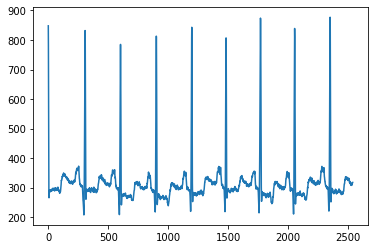

In [22]:
plt.plot(estimateData[2140:360*13])

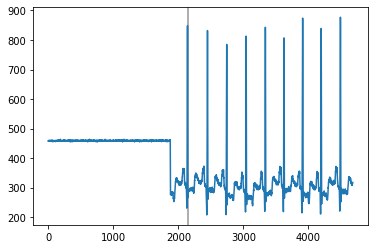

In [23]:
plt.plot(estimateData[0:360*13])
plt.axvspan(2140,2150,color='gray',alpha = 0.5)

In [24]:
segmentFile = open(path+"\\"+"segment.txt")

In [25]:
segmentData = []
while(True):
    line = None
    line = segmentFile.readline()
    print(line)
    if(line):
        d = []
        d.append(line.strip().split(","))
        d.append(segmentFile.readline().strip().split(","))
        d.append(segmentFile.readline().strip().split(","))

        print(d)
        segmentData.append(d)
    else:
        break
    


0,2140,true,10,S

[['0', '2140', 'true', '10', 'S'], ['0', '1780', '2140'], ['0', '2140', '2320']]
0,2447,true,70,N

[['0', '2447', 'true', '70', 'N'], ['0', '2087', '2447'], ['0', '2447', '2627']]
0,2743,true,72,N

[['0', '2743', 'true', '72', 'N'], ['0', '2383', '2743'], ['0', '2743', '2923']]
0,3041,true,72,N

[['0', '3041', 'true', '72', 'N'], ['0', '2681', '3041'], ['0', '3041', '3221']]
0,3337,true,72,N

[['0', '3337', 'true', '72', 'N'], ['0', '2977', '3337'], ['0', '3337', '3517']]
1,23,true,75,N

[['1', '23', 'true', '75', 'N'], ['0', '3263', '3600'], ['1', '0', '203']]
1,310,true,75,N

[['1', '310', 'true', '75', 'N'], ['0', '3550', '3600'], ['1', '0', '490']]
1,595,true,75,N

[['1', '595', 'true', '75', 'N'], ['1', '235', '595'], ['1', '595', '775']]
1,891,true,72,N

[['1', '891', 'true', '72', 'N'], ['1', '531', '891'], ['1', '891', '1071']]
1,1204,true,68,N

[['1', '1204', 'true', '68', 'N'], ['1', '844', '1204'], ['1', '1204', '1384']]
1,1500,true,72,N

[['1', '1500', 'tr

In [26]:
len(segmentData)

2312

In [27]:
segmentData[0]

[['0', '2140', 'true', '10', 'S'],
 ['0', '1780', '2140'],
 ['0', '2140', '2320']]

In [28]:
windowSegment = segmentData

In [29]:
windowSegment

[[['0', '2140', 'true', '10', 'S'],
  ['0', '1780', '2140'],
  ['0', '2140', '2320']],
 [['0', '2447', 'true', '70', 'N'],
  ['0', '2087', '2447'],
  ['0', '2447', '2627']],
 [['0', '2743', 'true', '72', 'N'],
  ['0', '2383', '2743'],
  ['0', '2743', '2923']],
 [['0', '3041', 'true', '72', 'N'],
  ['0', '2681', '3041'],
  ['0', '3041', '3221']],
 [['0', '3337', 'true', '72', 'N'],
  ['0', '2977', '3337'],
  ['0', '3337', '3517']],
 [['1', '23', 'true', '75', 'N'], ['0', '3263', '3600'], ['1', '0', '203']],
 [['1', '310', 'true', '75', 'N'], ['0', '3550', '3600'], ['1', '0', '490']],
 [['1', '595', 'true', '75', 'N'], ['1', '235', '595'], ['1', '595', '775']],
 [['1', '891', 'true', '72', 'N'], ['1', '531', '891'], ['1', '891', '1071']],
 [['1', '1204', 'true', '68', 'N'],
  ['1', '844', '1204'],
  ['1', '1204', '1384']],
 [['1', '1500', 'true', '72', 'N'],
  ['1', '1140', '1500'],
  ['1', '1500', '1680']],
 [['1', '1782', 'true', '76', 'N'],
  ['1', '1422', '1782'],
  ['1', '1782', '19

# real data

In [30]:
realData = pd.read_csv(path+"\\"+"100.csv",header=None).to_numpy().flatten()

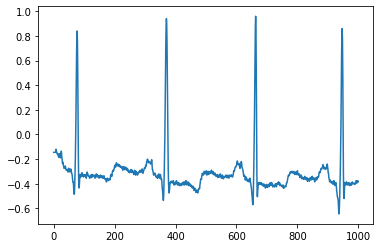

In [31]:
plt.plot(realData[0:1000])

# ★figure

1. n

In [ ]:
windowSegment

[[['0', '2140', 'true', '10', 'S'],
  ['0', '1780', '2140'],
  ['0', '2140', '2320']],
 [['0', '2447', 'true', '70', 'N'],
  ['0', '2087', '2447'],
  ['0', '2447', '2627']],
 [['0', '2743', 'true', '72', 'N'],
  ['0', '2383', '2743'],
  ['0', '2743', '2923']],
 [['0', '3041', 'true', '72', 'N'],
  ['0', '2681', '3041'],
  ['0', '3041', '3221']],
 [['0', '3337', 'true', '72', 'N'],
  ['0', '2977', '3337'],
  ['0', '3337', '3517']],
 [['1', '23', 'true', '75', 'N'], ['0', '3263', '3600'], ['1', '0', '203']],
 [['1', '310', 'true', '75', 'N'], ['0', '3550', '3600'], ['1', '0', '490']],
 [['1', '595', 'true', '75', 'N'], ['1', '235', '595'], ['1', '595', '775']],
 [['1', '891', 'true', '72', 'N'], ['1', '531', '891'], ['1', '891', '1071']],
 [['1', '1204', 'true', '68', 'N'],
  ['1', '844', '1204'],
  ['1', '1204', '1384']],
 [['1', '1500', 'true', '72', 'N'],
  ['1', '1140', '1500'],
  ['1', '1500', '1680']],
 [['1', '1782', 'true', '76', 'N'],
  ['1', '1422', '1782'],
  ['1', '1782', '19

In [ ]:
index = 1

In [ ]:
segment = windowSegment[1]

In [ ]:
segment

[['0', '2447', 'true', '70', 'N'],
 ['0', '2087', '2447'],
 ['0', '2447', '2627']]

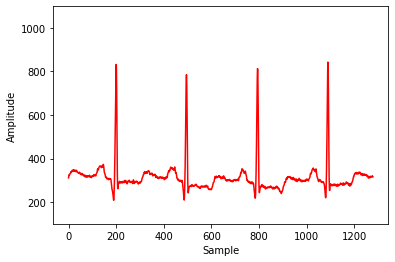

In [ ]:
startIndex = 3600*int(segment[0][0])+int(segment[0][1])
plt.plot(estimateData[startIndex-200:startIndex+360*3],color='red')
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.ylim((100,1099))
plt.savefig("05_01")

In [ ]:
windowSegment[1:1+4]

[[['0', '2447', 'true', '70', 'N'],
  ['0', '2087', '2447'],
  ['0', '2447', '2627']],
 [['0', '2743', 'true', '72', 'N'],
  ['0', '2383', '2743'],
  ['0', '2743', '2923']],
 [['0', '3041', 'true', '72', 'N'],
  ['0', '2681', '3041'],
  ['0', '3041', '3221']],
 [['0', '3337', 'true', '72', 'N'],
  ['0', '2977', '3337'],
  ['0', '3337', '3517']]]

In [ ]:
windowSegment

[[['0', '2140', 'true', '10', 'S'],
  ['0', '1780', '2140'],
  ['0', '2140', '2320']],
 [['0', '2447', 'true', '70', 'N'],
  ['0', '2087', '2447'],
  ['0', '2447', '2627']],
 [['0', '2743', 'true', '72', 'N'],
  ['0', '2383', '2743'],
  ['0', '2743', '2923']],
 [['0', '3041', 'true', '72', 'N'],
  ['0', '2681', '3041'],
  ['0', '3041', '3221']],
 [['0', '3337', 'true', '72', 'N'],
  ['0', '2977', '3337'],
  ['0', '3337', '3517']],
 [['1', '23', 'true', '75', 'N'], ['0', '3263', '3600'], ['1', '0', '203']],
 [['1', '310', 'true', '75', 'N'], ['0', '3550', '3600'], ['1', '0', '490']],
 [['1', '595', 'true', '75', 'N'], ['1', '235', '595'], ['1', '595', '775']],
 [['1', '891', 'true', '72', 'N'], ['1', '531', '891'], ['1', '891', '1071']],
 [['1', '1204', 'true', '68', 'N'],
  ['1', '844', '1204'],
  ['1', '1204', '1384']],
 [['1', '1500', 'true', '72', 'N'],
  ['1', '1140', '1500'],
  ['1', '1500', '1680']],
 [['1', '1782', 'true', '76', 'N'],
  ['1', '1422', '1782'],
  ['1', '1782', '19

In [33]:
for i in range(len(windowSegment)):
    if(windowSegment[i][0][4]=="S"):
        print(i)

0
217
245
329
428
541
586
974
1065
1072
1090
1107
1112
1206
1222
1311
1381
1466
1469
1507
1515
1537
1544
1578
1590
1722
1805
1893
1948
1960
1964
1988
2005
2054
2183


s1

In [44]:
segment = windowSegment[1988]

In [45]:
segment

[['159', '266', 'true', '90', 'S'],
 ['158', '3506', '3600'],
 ['159', '0', '446']]

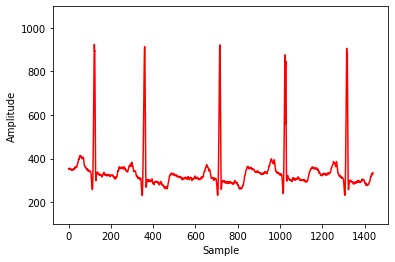

In [46]:
startIndex = 3600*int(segment[0][0])+int(segment[0][1])
plt.plot(estimateData[startIndex-360:startIndex+360*3],color='red')
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.ylim((100,1099))
plt.savefig("05_02")

In [47]:
windowSegment[1987]

[['159', '28', 'true', '71', 'N'],
 ['158', '3268', '3600'],
 ['159', '0', '208']]

In [48]:
windowSegment[1988-1:1988+4]

[[['159', '28', 'true', '71', 'N'],
  ['158', '3268', '3600'],
  ['159', '0', '208']],
 [['159', '266', 'true', '90', 'S'],
  ['158', '3506', '3600'],
  ['159', '0', '446']],
 [['159', '622', 'true', '60', 'N'],
  ['159', '262', '622'],
  ['159', '622', '802']],
 [['159', '929', 'true', '70', 'N'],
  ['159', '569', '929'],
  ['159', '929', '1109']],
 [['159', '1221', 'true', '73', 'N'],
  ['159', '861', '1221'],
  ['159', '1221', '1401']]]

s2

In [49]:
segment = windowSegment[217]

In [50]:
segment

[['18', '264', 'true', '115', 'S'], ['17', '3504', '3600'], ['18', '0', '444']]

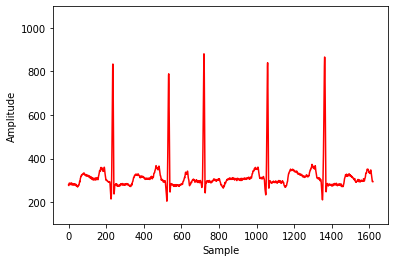

In [57]:
startIndex = 3600*int(segment[0][0])+int(segment[0][1])
plt.plot(estimateData[startIndex-360-360:startIndex+180+360+360],color='red')
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.ylim((100,1099))
plt.savefig("05_03")

In [52]:
windowSegment[217]

[['18', '264', 'true', '115', 'S'], ['17', '3504', '3600'], ['18', '0', '444']]

In [58]:
windowSegment[217-2:217+3]

[[['17', '3380', 'true', '77', 'N'],
  ['17', '3020', '3380'],
  ['17', '3380', '3560']],
 [['18', '77', 'true', '72', 'N'], ['17', '3317', '3600'], ['18', '0', '257']],
 [['18', '264', 'true', '115', 'S'],
  ['17', '3504', '3600'],
  ['18', '0', '444']],
 [['18', '603', 'true', '63', 'N'],
  ['18', '243', '603'],
  ['18', '603', '783']],
 [['18', '906', 'true', '71', 'N'],
  ['18', '546', '906'],
  ['18', '906', '1086']]]

# real segment

In [ ]:
pathRealData = "C:\\sebin\\lab\\ecg2\\data\\original\\01_mitbih"

In [ ]:
ecg = ecg_segment(pathRealData+"\\"+str(100),channel=[0],ver="aami",baseLineRemoveFlag=1,leftSegSize=360,rightSegSize=180,resample_seg_size=-1)

100
tmp:  2274
startIndex,endIndex:  1   2271
seg:  2271
interval:  2271
startIndex:  9  
seg,interval:  2262   2262


# check

In [ ]:
ecg.beat[0]

array(['77', 'N', '0.84'], dtype='<U32')

## real 시작점 

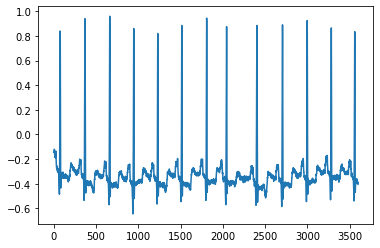

In [ ]:
plt.plot(realData[0:3600])

In [ ]:
realStartArray = ecg.beat[1]

In [ ]:
realStartArray

array(['370', 'N', '0.94'], dtype='<U32')

In [ ]:
realStart = int(realStartArray[0])

## segmentStart

In [ ]:
segmentStartArray = windowSegment[2]

In [ ]:
segmentStartArray

[['1', '1241', 'true', '70', 'N'], ['1', '881', '1241'], ['1', '1241', '1421']]

In [ ]:
segmentStartFlag = int(segmentStartArray[0][0])

In [ ]:
segmentStartIndex = int(segmentStartArray[0][1])

## estimateStart

In [ ]:
estimateStart = segmentStartFlag * 3600 + segmentStartIndex 

In [ ]:
estimateStart

4841

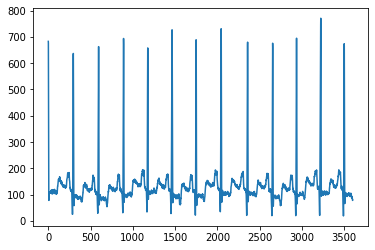

In [ ]:
plt.plot(estimateData[estimateStart:estimateStart+3600])

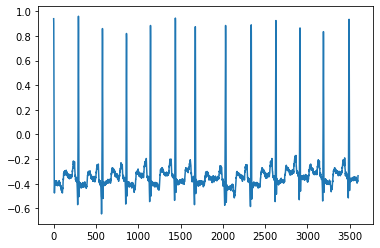

In [ ]:
plt.plot(realData[realStart:realStart+3600])

In [ ]:
backup = windowSegment

In [ ]:
backup

[[['0', '1301', 'true', '16', 'S'],
  ['0', '941', '1301'],
  ['0', '1301', '1481']],
 [['1', '934', 'true', '6', 'S'], ['1', '574', '934'], ['1', '934', '1114']],
 [['1', '1241', 'true', '70', 'N'],
  ['1', '881', '1241'],
  ['1', '1241', '1421']],
 [['1', '1537', 'true', '72', 'N'],
  ['1', '1177', '1537'],
  ['1', '1537', '1717']],
 [['1', '1836', 'true', '72', 'N'],
  ['1', '1476', '1836'],
  ['1', '1836', '2016']],
 [['1', '2131', 'true', '73', 'N'],
  ['1', '1771', '2131'],
  ['1', '2131', '2311']],
 [['1', '2417', 'true', '75', 'N'],
  ['1', '2057', '2417'],
  ['1', '2417', '2597']],
 [['1', '2705', 'true', '74', 'N'],
  ['1', '2345', '2705'],
  ['1', '2705', '2885']],
 [['1', '2989', 'true', '75', 'N'],
  ['1', '2629', '2989'],
  ['1', '2989', '3169']],
 [['1', '3285', 'true', '72', 'N'],
  ['1', '2925', '3285'],
  ['1', '3285', '3465']],
 [['1', '3598', 'true', '68', 'N'], ['1', '3238', '3600'], ['2', '0', '178']],
 [['2', '294', 'true', '72', 'N'], ['1', '3534', '3600'], ['2'

In [ ]:
estimateSegment = windowSegment[2:]

In [ ]:
estimateSegment

[[['1', '1241', 'true', '70', 'N'],
  ['1', '881', '1241'],
  ['1', '1241', '1421']],
 [['1', '1537', 'true', '72', 'N'],
  ['1', '1177', '1537'],
  ['1', '1537', '1717']],
 [['1', '1836', 'true', '72', 'N'],
  ['1', '1476', '1836'],
  ['1', '1836', '2016']],
 [['1', '2131', 'true', '73', 'N'],
  ['1', '1771', '2131'],
  ['1', '2131', '2311']],
 [['1', '2417', 'true', '75', 'N'],
  ['1', '2057', '2417'],
  ['1', '2417', '2597']],
 [['1', '2705', 'true', '74', 'N'],
  ['1', '2345', '2705'],
  ['1', '2705', '2885']],
 [['1', '2989', 'true', '75', 'N'],
  ['1', '2629', '2989'],
  ['1', '2989', '3169']],
 [['1', '3285', 'true', '72', 'N'],
  ['1', '2925', '3285'],
  ['1', '3285', '3465']],
 [['1', '3598', 'true', '68', 'N'], ['1', '3238', '3600'], ['2', '0', '178']],
 [['2', '294', 'true', '72', 'N'], ['1', '3534', '3600'], ['2', '0', '474']],
 [['2', '577', 'true', '76', 'N'], ['2', '217', '577'], ['2', '577', '757']],
 [['2', '863', 'true', '75', 'N'], ['2', '503', '863'], ['2', '863', '

In [ ]:
for i in range(len(estimateSegment)):
    flag = int(estimateSegment[i][0][0])
    index = int(estimateSegment[i][0][1])

    peakIndex = flag*3600+ index 
    ann = estimateSegment[i][0][4]

    estimateSegment[i] = [peakIndex,ann]


In [ ]:
estimateSegment

[[4841, 'N'],
 [5137, 'N'],
 [5436, 'N'],
 [5731, 'N'],
 [6017, 'N'],
 [6305, 'N'],
 [6589, 'N'],
 [6885, 'N'],
 [7198, 'N'],
 [7494, 'N'],
 [7777, 'N'],
 [8063, 'N'],
 [8340, 'N'],
 [8624, 'N'],
 [8917, 'N'],
 [9210, 'N'],
 [9508, 'N'],
 [9812, 'N'],
 [10102, 'N'],
 [10381, 'N'],
 [10668, 'N'],
 [10953, 'N'],
 [11261, 'N'],
 [11565, 'N'],
 [11862, 'N'],
 [12151, 'N'],
 [12451, 'N'],
 [12736, 'N'],
 [13021, 'N'],
 [13315, 'N'],
 [13620, 'N'],
 [13937, 'N'],
 [14232, 'N'],
 [14512, 'N'],
 [14801, 'N'],
 [15093, 'N'],
 [15381, 'N'],
 [15682, 'N'],
 [15980, 'N'],
 [16277, 'N'],
 [16570, 'N'],
 [16853, 'N'],
 [17135, 'N'],
 [17425, 'N'],
 [17728, 'N'],
 [18028, 'N'],
 [18327, 'N'],
 [18617, 'N'],
 [18897, 'N'],
 [19184, 'N'],
 [19466, 'N'],
 [19750, 'N'],
 [20058, 'N'],
 [20363, 'N'],
 [20659, 'N'],
 [20941, 'N'],
 [21224, 'N'],
 [21507, 'N'],
 [21801, 'N'],
 [22093, 'N'],
 [22398, 'N'],
 [22699, 'N'],
 [22990, 'N'],
 [23272, 'N'],
 [23550, 'N'],
 [23833, 'N'],
 [24123, 'N'],
 [24426, 'N']

In [ ]:
notDetect = 0
notDetectSave = []
notCorrect = 0
notCorrectSave = []
correct = 0


window = 200

for i in range(1,len(ecg.beat),1):
    realBeat = ecg.beat[i]

    tmp = int(realBeat[0]) - realStart
    
    rs = int(realBeat[0])
    es = estimateStart + tmp

    print("tmp:",tmp)
    print("rs:",rs)
    print("es:",es)


    for j in range(0,len(estimateSegment)):
        if( (es-window) < estimateSegment[j][0] and (es+window) > estimateSegment[j][0] ):
            if(estimateSegment[j][1] == realBeat[1]):
                print("correct")
                correct += 1
                break
            else:
                notCorrect+=1
                notCorrectSave.append([i,j])
                break
        elif(estimateSegment[j][0] > (es+window)):
            print("not defiend")
            notDetectSave.append([i,j])
            notDetect+=1
            break
            
    
    

tmp: 0
rs: 370
es: 4841
correct
tmp: 292
rs: 662
es: 5133
correct
tmp: 576
rs: 946
es: 5417
correct
tmp: 861
rs: 1231
es: 5702
correct
tmp: 1145
rs: 1515
es: 5986
correct
tmp: 1439
rs: 1809
es: 6280
correct
tmp: 1674
rs: 2044
es: 6515
tmp: 2032
rs: 2402
es: 6873
correct
tmp: 2336
rs: 2706
es: 7177
correct
tmp: 2628
rs: 2998
es: 7469
correct
tmp: 2912
rs: 3282
es: 7753
correct
tmp: 3190
rs: 3560
es: 8031
correct
tmp: 3492
rs: 3862
es: 8333
correct
tmp: 3800
rs: 4170
es: 8641
correct
tmp: 4096
rs: 4466
es: 8937
correct
tmp: 4394
rs: 4764
es: 9235
correct
tmp: 4690
rs: 5060
es: 9531
correct
tmp: 4976
rs: 5346
es: 9817
correct
tmp: 5263
rs: 5633
es: 10104
correct
tmp: 5548
rs: 5918
es: 10389
correct
tmp: 5844
rs: 6214
es: 10685
correct
tmp: 6157
rs: 6527
es: 10998
correct
tmp: 6453
rs: 6823
es: 11294
correct
tmp: 6736
rs: 7106
es: 11577
correct
tmp: 7021
rs: 7391
es: 11862
correct
tmp: 7300
rs: 7670
es: 12141
correct
tmp: 7583
rs: 7953
es: 12424
correct
tmp: 7875
rs: 8245
es: 12716
correct

In [ ]:
notDetect

14

In [ ]:
notCorrect

72

In [ ]:
correct

2186

In [ ]:
notCorrectSave

[[7, 6],
 [230, 229],
 [245, 244],
 [258, 257],
 [342, 341],
 [427, 427],
 [430, 430],
 [441, 441],
 [540, 540],
 [544, 545],
 [545, 546],
 [585, 585],
 [599, 598],
 [973, 973],
 [987, 986],
 [1078, 1077],
 [1085, 1084],
 [1089, 1089],
 [1103, 1102],
 [1120, 1119],
 [1125, 1124],
 [1219, 1218],
 [1229, 1228],
 [1235, 1234],
 [1324, 1323],
 [1394, 1393],
 [1479, 1478],
 [1482, 1481],
 [1520, 1519],
 [1528, 1527],
 [1537, 1536],
 [1544, 1543],
 [1550, 1549],
 [1557, 1556],
 [1578, 1577],
 [1591, 1590],
 [1603, 1602],
 [1735, 1734],
 [1818, 1817],
 [1893, 1892],
 [1906, 1905],
 [1961, 1960],
 [1973, 1972],
 [1977, 1976],
 [1988, 1987],
 [2001, 2000],
 [2005, 2004],
 [2018, 2017],
 [2053, 2053],
 [2067, 2066],
 [2072, 2072],
 [2182, 2182],
 [2186, 2186],
 [2196, 2196]]

In [ ]:
notDetectSave

[[7, 7],
 [230, 230],
 [245, 245],
 [258, 258],
 [329, 329],
 [342, 342],
 [441, 442],
 [544, 546],
 [545, 547],
 [599, 599],
 [987, 987],
 [1078, 1078],
 [1085, 1085],
 [1103, 1103],
 [1107, 1107],
 [1112, 1112],
 [1120, 1120],
 [1125, 1125],
 [1206, 1206],
 [1219, 1219],
 [1222, 1222],
 [1229, 1229],
 [1235, 1235],
 [1324, 1324],
 [1381, 1381],
 [1394, 1394],
 [1466, 1466],
 [1479, 1479],
 [1482, 1482],
 [1507, 1507],
 [1520, 1520],
 [1528, 1528],
 [1537, 1537],
 [1544, 1544],
 [1550, 1550],
 [1557, 1557],
 [1578, 1578],
 [1590, 1590],
 [1591, 1591],
 [1603, 1603],
 [1735, 1735],
 [1805, 1805],
 [1818, 1818],
 [1893, 1893],
 [1906, 1906],
 [1948, 1948],
 [1961, 1961],
 [1973, 1973],
 [1977, 1977],
 [1988, 1988],
 [2001, 2001],
 [2005, 2005],
 [2018, 2018],
 [2067, 2067],
 [2072, 2073],
 [2186, 2187],
 [2196, 2197],
 [2258, 2259],
 [2259, 2259],
 [2260, 2259],
 [2261, 2259],
 [2262, 2259],
 [2263, 2259],
 [2264, 2259],
 [2265, 2259],
 [2266, 2259],
 [2267, 2259],
 [2268, 2259],
 [2269

In [ ]:
ecg.beat[0]

array(['77', 'N', '0.84'], dtype='<U32')

In [ ]:
count = [-1,0,0]
for i in ecg.beat:
    if(i[1]=='N'):
        print("n")
        count[0] +=1
    if(i[1]=='S'):
        print("s")
        count[1] +=1
    if(i[1]=='V'):
        print("v")
        count[2]+=1




n
n
n
n
n
n
n
s
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
s
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
s
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
s
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
s
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n


In [ ]:
count

[2238, 33, 1]

In [ ]:
count = [0,0,0]
for i in range(len(estimateSegment)):
    if(i>2272):
        break
    if(estimateSegment[i][1]=='N'):
        print("n")
        count[0] +=1
    if(estimateSegment[i][1]=='S'):
        print("s")
        count[1] +=1
    if(estimateSegment[i][1]=='V'):
        print("v")
        count[2]+=1


n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
s
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
s
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
s
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
s
n
n
s
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n


In [ ]:
count

[2230, 43, 0]